In [1]:
# project: p2
# submitter: mjblumenthal
# partner: none
# hours: 10

In [2]:
import loans
import search
from search import BST
import time
import matplotlib.pyplot as plt
# import concurrent.futures
from io import TextIOWrapper



In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
# values = {'activity_year': '2021', 'lei': '549300Q76VHK6FGPX546', 'derived_msa-md': '24580', 'state_code': 'WI','county_code': '55009', 'census_tract': '55009020702', 'conforming_loan_limit': 'C', 'derived_loan_product_type': 'Conventional:First Lien', 'derived_dwelling_category': 'Single Family (1-4 Units):Site-Built', 'derived_ethnicity': 'Not Hispanic or Latino', 'derived_race': 'White', 'derived_sex': 'Joint', 'action_taken': '1', 'purchaser_type': '1', 'preapproval': '2', 'loan_type': '1', 'loan_purpose': '31', 'lien_status': '1', 'reverse_mortgage': '2', 'open-end_line_of_credit': '2', 'business_or_commercial_purpose': '2', 'loan_amount': '325000.0', 'loan_to_value_ratio': '73.409', 'interest_rate': '2.5', 'rate_spread': '0.304', 'hoepa_status': '2', 'total_loan_costs': '3932.75', 'total_points_and_fees': 'NA', 'origination_charges': '3117.5', 'discount_points': '', 'lender_credits': '', 'loan_term': '240', 'prepayment_penalty_term': 'NA', 'intro_rate_period': 'NA', 'negative_amortization': '2', 'interest_only_payment': '2', 'balloon_payment': '2', 'other_nonamortizing_features': '2', 'property_value': '445000', 'construction_method': '1', 'occupancy_type': '1', 'manufactured_home_secured_property_type': '3', 'manufactured_home_land_property_interest': '5', 'total_units': '1', 'multifamily_affordable_units': 'NA', 'income': '264', 'debt_to_income_ratio': '20%-<30%', 'applicant_credit_score_type': '2', 'co-applicant_credit_score_type': '9', 'applicant_ethnicity-1': '2', 'applicant_ethnicity-2': '', 'applicant_ethnicity-3': '', 'applicant_ethnicity-4': '', 'applicant_ethnicity-5': '', 'co-applicant_ethnicity-1': '2', 'co-applicant_ethnicity-2': '', 'co-applicant_ethnicity-3': '', 'co-applicant_ethnicity-4': '', 'co-applicant_ethnicity-5': '', 'applicant_ethnicity_observed': '2', 'co-applicant_ethnicity_observed': '2', 'applicant_race-1': '5', 'applicant_race-2': '', 'applicant_race-3': '', 'applicant_race-4': '', 'applicant_race-5': '', 'co-applicant_race-1': '5', 'co-applicant_race-2': '', 'co-applicant_race-3': '', 'co-applicant_race-4': '', 'co-applicant_race-5': '', 'applicant_race_observed': '2', 'co-applicant_race_observed': '2', 'applicant_sex': '1', 'co-applicant_sex': '2', 'applicant_sex_observed': '2', 'co-applicant_sex_observed': '2', 'applicant_age': '35-44', 'co-applicant_age': '35-44', 'applicant_age_above_62': 'No', 'co-applicant_age_above_62': 'No', 'submission_of_application': '1', 'initially_payable_to_institution': '1', 'aus-1': '1', 'aus-2': '', 'aus-3': '', 'aus-4': '', 'aus-5': '', 'denial_reason-1': '10', 'denial_reason-2': '', 'denial_reason-3': '', 'denial_reason-4': '', 'tract_population': '6839', 'tract_minority_population_percent': '8.85999999999999943', 'ffiec_msa_md_median_family_income': '80100', 'tract_to_msa_income_percentage': '150', 'tract_owner_occupied_units': '1701', 'tract_one_to_four_family_homes': '2056', 'tract_median_age_of_housing_units': '15'}

In [5]:
# loan = loans.Loan(values)

In [6]:
first_home_bank = loans.Bank("First Home Bank")

In [7]:
#Q1
def calculate_average_interest_rate(bank):
    total_interest_rate = 0
    count = 0
    for loan in bank.loans:   
        if loan.interest_rate != -1: 
            total_interest_rate += loan.interest_rate
            count += 1

    if count > 0:
        average_interest_rate = total_interest_rate / count
        return average_interest_rate
    else:
        return None

average_interest_rate = calculate_average_interest_rate(first_home_bank)

average_interest_rate

2.8333333333333335

In [8]:
#Q2
def calculate_average_applicants_per_loan(bank):
    total_applicants = 0
    total_loans = len(bank.loans)

    for loan in bank.loans:
        total_applicants += len(loan.applicants)

    if total_loans > 0:
        average_applicants_per_loan = total_applicants / total_loans
        return average_applicants_per_loan
    else:
        return None

average_applicants_per_loan = calculate_average_applicants_per_loan(first_home_bank)

average_applicants_per_loan

1.3043478260869565

In [9]:
#Q3
def calculate_age_distribution(bank):
    age_distribution = {}

    for loan in bank.loans:
        for applicant in loan.applicants:
            age = applicant.age
            if age in age_distribution:
                age_distribution[age] += 1
            else:
                age_distribution[age] = 1

    return age_distribution

age_distribution = calculate_age_distribution(first_home_bank)

age_distribution

{'55-64': 12, '45-54': 8, '65-74': 3, '25-34': 3, '35-44': 1, '>74': 3}

In [10]:
#Q4
loan_bst = BST()
bank = first_home_bank

for loan in bank.loans:  
    loan_bst.add(loan.interest_rate, loan)

# Count the number of loans with missing interest rates
def count_missing_interest_rates(node):
    if node is None:
        return 0

    count = count_missing_interest_rates(node.left) + count_missing_interest_rates(node.right)

    for value in node.values:
        if value.interest_rate == -1:
            count += 1

    return count

missing_rate_count = count_missing_interest_rates(loan_bst.root)
missing_rate_count

11

In [11]:
#Q5
def tree_height(node):
    if node is None:
        return -1  
    else:
        left_height = tree_height(node.left)
        right_height = tree_height(node.right)
        return max(left_height, right_height) + 1

loan_bst = BST()

for loan in bank.loans: 
    loan_bst.add(loan.interest_rate, loan)

tree_height_value = tree_height(loan_bst.root)

tree_height_value

5

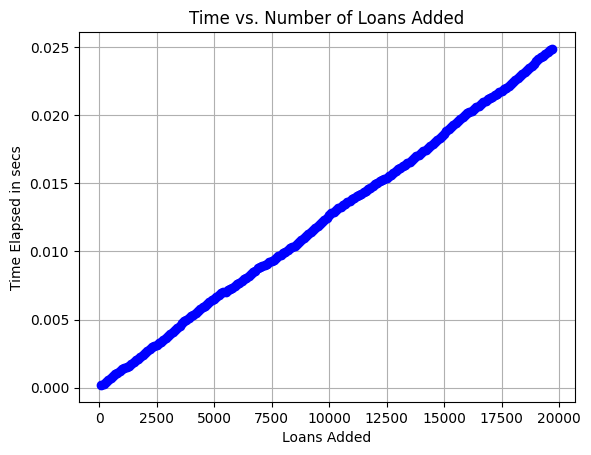

In [12]:
#Q6

uwcu = loans.Bank("University of Wisconsin Credit Union")
loan_bst = BST()

num_loans_added = []
time_elapsed = []

start_time = time.time()

for i, loan in enumerate(uwcu.loans):
    loan_bst.add(loan.interest_rate, loan)

    if (i + 1) % 100 == 0:  # Plot every 100 loans added
        elapsed_time = time.time() - start_time
        num_loans_added.append(i + 1)
        time_elapsed.append(elapsed_time)

# Plot the data after the loop
plt.plot(num_loans_added, time_elapsed, marker='o', linestyle='-', color='b')
plt.xlabel('Loans Added')
plt.ylabel('Time Elapsed in secs')
plt.title('Time vs. Number of Loans Added')
plt.grid(True)
plt.show()


# uwcu = loans.Bank("University of Wisconsin Credit Union")
# loan_bst = BST()

# num_loans_added = []
# time_elapsed = []

# def add_loan_to_bst(args):
#     loan_bst, loan = args
#     loan_bst.add(loan.interest_rate, loan)

# start_time = time.time()

# # Bulk insertion with parallel processing
# with concurrent.futures.ThreadPoolExecutor() as executor:
#     executor.map(add_loan_to_bst, [(loan_bst, loan) for loan in uwcu.loans])

#     for i in range(0, len(uwcu.loans), 100):
#         batch = uwcu.loans[i:i+100]

#         # Collect data for plotting
#         elapsed_time = time.time() - start_time
#         num_loans_added.append(i + 100)  # Add 100 loans per batch
#         time_elapsed.append(elapsed_time)

# # Plot the data after the loop
# plt.plot(num_loans_added, time_elapsed, marker='o', linestyle='-', color='b')
# plt.xlabel('Loans Added')
# plt.ylabel('Time Elapsed in secs')
# plt.title('Time vs. Number of Loans Added (Bulk Insertion and Parallel Processing)')
# plt.grid(True)
# plt.show()

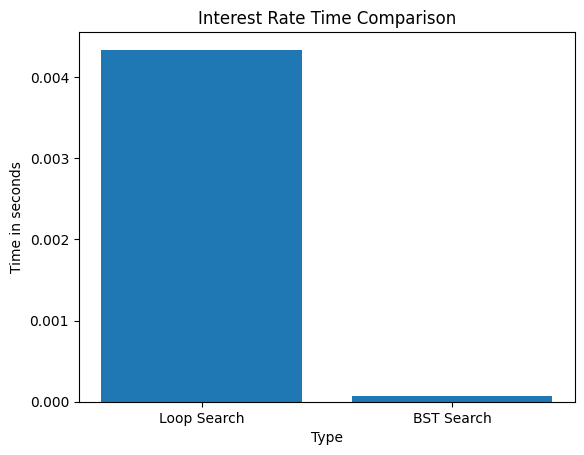

In [13]:
#Q7
time_loop_search = []
time_bst_search = []
loan_bst = BST()  
for loan in uwcu.loans:
    loan_bst.add(loan.interest_rate, loan)
start_time = time.time()
missing_rate_count_loop = sum(1 for loan in uwcu.loans if loan.interest_rate == -1)
elapsed_time = time.time() - start_time
time_loop_search.append(elapsed_time)

start_time = time.time()
missing_rate_count_bst = len(loan_bst[-1])
elapsed_time = time.time() - start_time
time_bst_search.append(elapsed_time)

operations = ['Loop Search', 'BST Search']
times = [sum(time_loop_search), sum(time_bst_search)]

plt.bar(operations, times)
plt.xlabel('Type')
plt.ylabel('Time in seconds')
plt.title('Interest Rate Time Comparison')
plt.show()


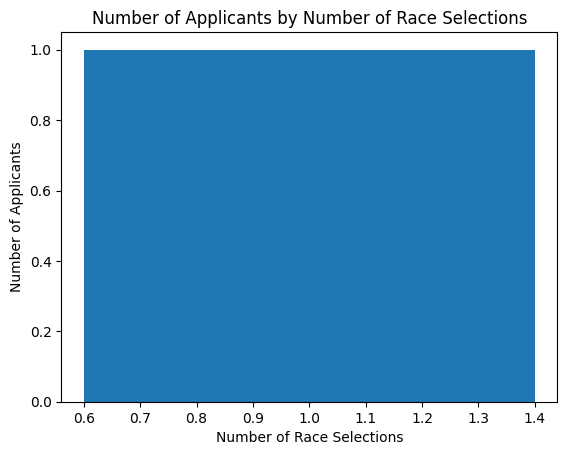

In [14]:
#Q8
race_selection_counts = {}

for applicant in loan.applicants:
    num_race_selections = len(applicant.race)
    if num_race_selections in race_selection_counts:
        race_selection_counts[num_race_selections] += 1
    else:
        race_selection_counts[num_race_selections] = 1


x_values = list(race_selection_counts.keys())
y_values = list(race_selection_counts.values())

plt.bar(x_values, y_values, align='center')
plt.xlabel('Number of Race Selections')
plt.ylabel('Number of Applicants')
plt.title('Number of Applicants by Number of Race Selections')
plt.show()

In [15]:
#Q9
leaf_node_count = loan_bst.count_leaf_nodes()
leaf_node_count

13

In [16]:
#Q10
fifth_largest_rate = loan_bst.find_kth_largest(5)
fifth_largest_rate

6.49